<a href="https://colab.research.google.com/github/RazerRaymond/MachineLearningPS/blob/main/KMeans_Cluttering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Studying Employee Attrition With K-Means


Collaborators: Xiaowen(Nancy) Ma 


## 1. The Initial Centroids

The $k$-means algorithm is sensitive to the initial starting points. In this section, let's explore this. For a toy dataset with some more clusters.

In [ ]:
from utility.util import load_toy, configure_plots
from utility.lab import sample_centroids, fit, plot_kmeans,assign,euclidean,compute_centroids

# run this cell twice to have pretty plots
configure_plots()

X, _ = load_toy(500, 5, width=0.07, random_state=4)

Initial Data Visualization

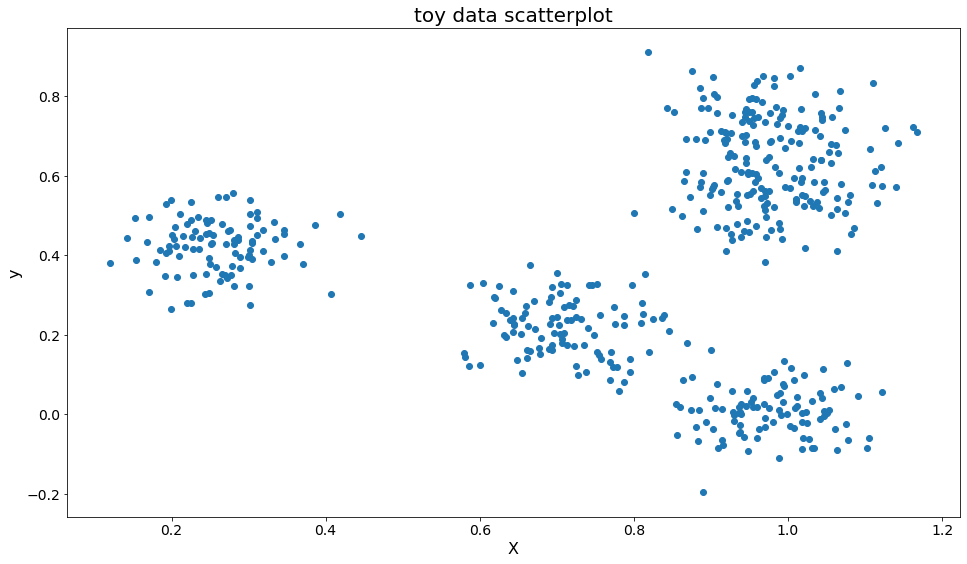

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
plt.scatter(X[:,0],X[:,1])
plt.title("toy data scatterplot")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Visualize different final centroids depending on the initial starting points. Use the data sampled above and produce two plots in the two code cells provided below; one of them should show a reasonabley nice $k$-means solution. 

In [ ]:
# your code here
old_centroids = sample_centroids(X, 4, random_state=4)

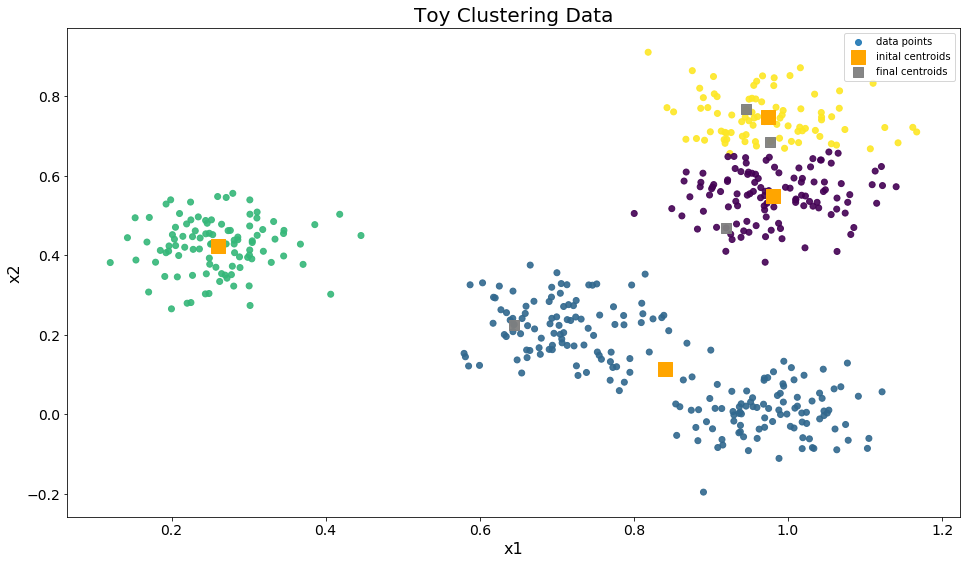

In [ ]:
# your code here
centroids, assignments = fit(X, 4)
plot_kmeans(X, centroids, prev_centroids=old_centroids, assignments=assignments)

## 2. Using `sklearn` for $k$-means 

In this section, we will explore the [$k$-means model from `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) and discuss some of the additional features supplied by their implementation. 

### Looking Into the Model

Now let's create a new $k$-means model and learn about it's interface. In general, you will find that the $k$-means model from `sklearn` shares a lot of the same methods as the other models that we have looked at. However, there are some differences that are notable.

In [ ]:
from sklearn.cluster import KMeans

model = KMeans()

### Clustering the Toy Data with `sklearn`

Let's try using `sklearn` to cluster our data.

Create and fit a _new_ `KMeans` model of our data with the default arguments except for `random_state` which should be set to 11. _Be sure to store the fit centroids and assignments in variables for use later._

In [ ]:
# your code here

newM = KMeans(random_state=11).fit(X)
label = newM.labels_
print(np.sum(label == 0))
print(np.sum(label == 1))
print(np.sum(label == 2))
print(np.sum(label == 3))
print(np.sum(label == 4))
print(np.sum(label == 5))
print(np.sum(label == 6))
print(np.sum(label == 7))
newM

51
63
100
84
52
53
46
51


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=11, tol=0.0001, verbose=0)

How many centroids were fit by the model? How many points were assigned to each cluster?

Create a plot showing the centroids that were produced by the model and the data points colored by their cluster assignment. 

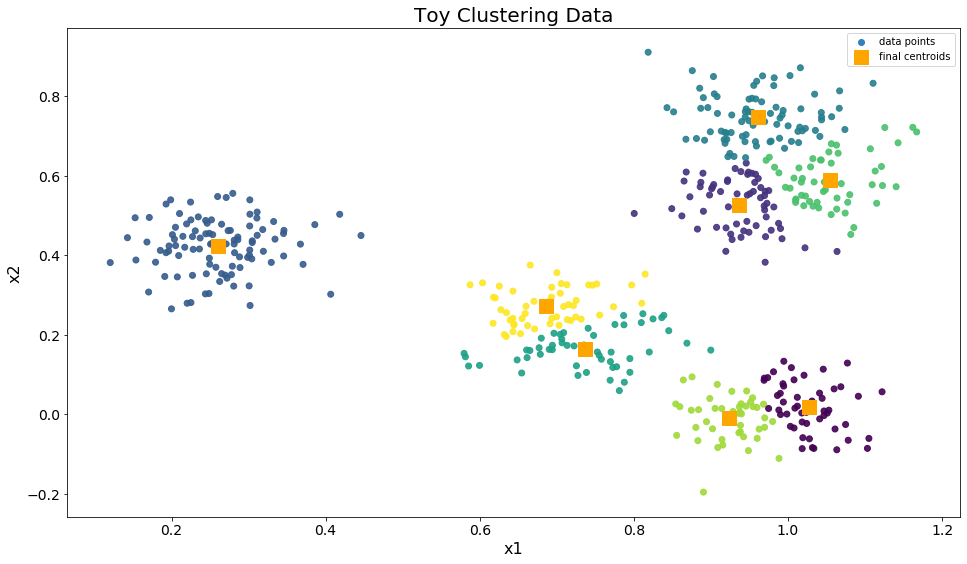

In [ ]:
# your code here
plot_kmeans(X, newM.cluster_centers_, assignments=newM.labels_)
plt.legend(['data points','final centroids'])

## Number of Cluster

Consider the Sum of Squared Distances $SSD_j$ as the sum of all points in the $j$th cluster to its corresponsing cluster center $c_j$: 
$$SSD_j = \sum_{i=1}^{n} z_{ij} \;d(x_i,c_j)^2,$$
where $z_{ij}$ is 1 if $x_i$ belongs to cluster $j$ and 0 otherwise. 


Use the elbow method described in both lecture and Lab 7 to find a good clustering for our data. Produce a plot that shows the model performance $SSD(k)$ as a function of $k$, where $SSD(k) = \sum_{j=1}^k SSD_j$.  Make sure to create new models when appropriate.

<function matplotlib.pyplot.show(*args, **kw)>

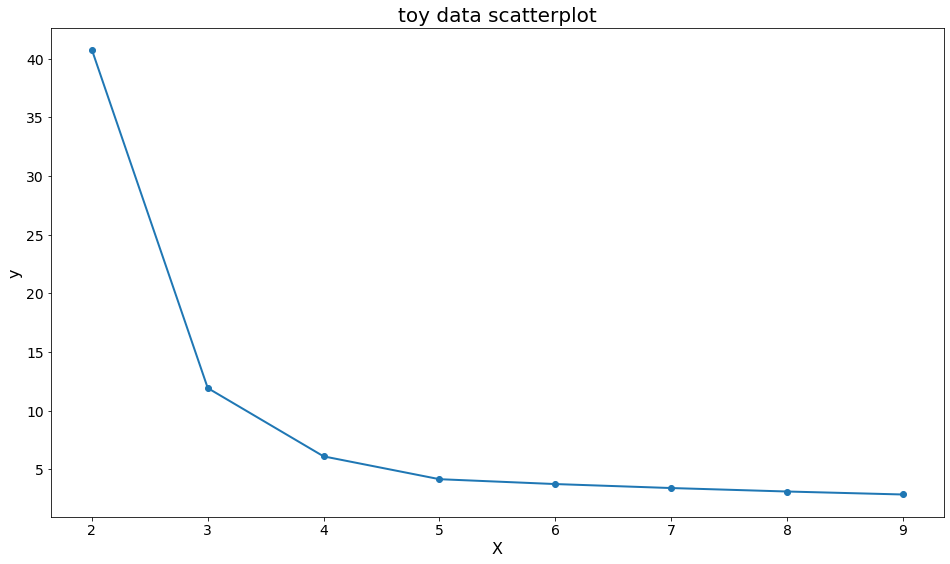

In [ ]:
from utility.util import distance_measure

# your code here
k=2
arr=[]
index=[]
while k < 10:
    dist = 0
    index.append(k)
    mod = KMeans(n_clusters=k,random_state=11).fit(X)
    center = mod.cluster_centers_
    label = mod.predict(X)
    for i in range(len(X)):
        dist += np.square(distance_measure(X[i],center[label[i]]))
    arr.append(dist)
    k+=1
plt.scatter(index,arr)
plt.title("toy data scatterplot")
plt.xlabel("X")
plt.ylabel("y")
plt.plot(index,arr)
plt.show


## 3. Tackling Employee Attrition


A real problem that Human Resources (HR) departments in companies across the work would like to address is employee attrition, or turnover. They would like to reduce the number of employees who leave the company as hiring new employees is expensive. In this section, we use k-means to use in real world emploee attrition.

To show off there shiny Watson platform, IBM released a (fictional) [sample dataset](https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/) in 2015 containing employee statistics and whether or not they left the company.

In [ ]:
import pandas as pd

data = pd.read_csv('./utility/data/HR-Employee-Attrition.csv')
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


[`replace`](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) the string values in categorical variables with enumerations. Make uses of the `encoded` `DataFrame` which is a copy of `data`. 

In [ ]:
encoded = data.copy()

# your code here
cate =  encoded.select_dtypes(include='object').columns
for i in cate:
    arr = []
    value = []
    res = list(enumerate(list(np.unique(encoded[i]))))
    for j,k in res:
        value.append(j)
        arr.append(k)
    encoded[i] = [value[arr.index(x)] for x in data[i]]

assert encoded.shape == data.shape, 'The encoded version of `data` should have the same shape'
assert np.all(encoded.dtypes == 'int64'), 'All values in `encoded` should be integers'


That said, we will need to prepare an $X$ matrix of our dataset. At this point, we will drop the `'Attrition'` column from our dataset. We will also [scale our data](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling). 

In [ ]:
from sklearn.preprocessing import scale

X = scale(np.float64(encoded.copy().drop('Attrition', axis=1)))

### Build the Elbow plot to find k

<function matplotlib.pyplot.show(*args, **kw)>

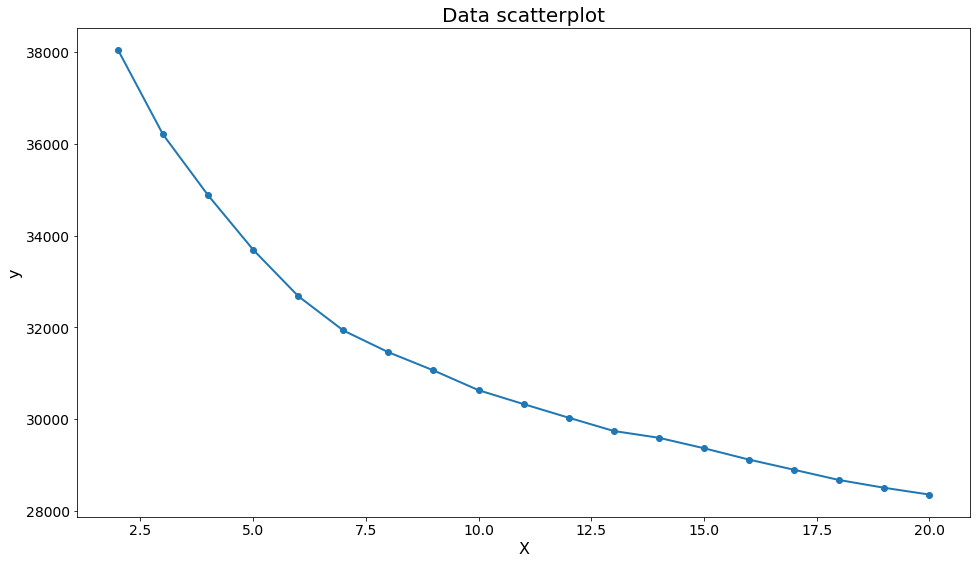

In [ ]:
# your code here
k=2
arr=[]
index=[]
while k < 21:
    dist = 0
    index.append(k)
    mod = KMeans(n_clusters=k).fit(X)
    center = mod.cluster_centers_
    label = mod.predict(X)
    for i in range(len(X)):
        dist += np.square(distance_measure(X[i],center[label[i]]))
    arr.append(dist)
    k+=1
plt.scatter(index,arr)
plt.title("Data scatterplot")
plt.xlabel("X")
plt.ylabel("y")
plt.plot(index,arr)
plt.show


### Fit a new model

In [ ]:
# your code here
empMod = KMeans(n_clusters = 6,random_state=11)
empMod.fit(X)
centroids = empMod.cluster_centers_
assignments = empMod.predict(X)

### Add Cluster Assignment

In the following cell, we add our cluster assignments to `data`. We also compute a pivot table which provides a summary of each cluster.

In [ ]:
data['Cluster'] = assignments
pivot = data.pivot_table(index='Cluster', aggfunc=np.mean)

In [ ]:
arr = np.zeros(6)

for i in empMod.labels_:
    arr[i]+=1
pivot['% of Attrition'] = arr/empMod.labels_.size*100

assert np.isclose(pivot['% of Attrition'].sum(), 100), 'Sum of percentage attrition should be 100'

In [ ]:
pivot.sort_values(by='% of Attrition', axis=0).T

Cluster,4,5,0,3,1,2
Age,46.320611,48.809160,34.862434,33.607930,36.354515,33.931034
DailyRate,753.580153,875.435115,800.280423,826.370044,779.856187,799.669371
DistanceFromHome,8.824427,9.351145,9.846561,9.859031,9.394649,8.567951
Education,3.007634,3.160305,2.798942,2.837004,3.073579,2.803245
EnvironmentSatisfaction,2.603053,2.717557,2.645503,2.731278,2.839465,2.707911
HourlyRate,65.572519,66.610687,65.698413,66.136564,64.030100,66.874239
JobInvolvement,2.618321,2.816794,2.714286,2.669604,2.772575,2.744422
JobLevel,4.007634,3.786260,1.661376,1.792952,2.120401,1.334686
JobSatisfaction,2.625954,2.709924,2.730159,2.682819,2.779264,2.750507
MonthlyIncome,15091.992366,14212.274809,4726.608466,5089.951542,6229.658863,3669.440162
